## Data Visualization

In [6]:
# Dependencies and packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import datetime as dt
import seaborn as sns
import pandas as pd
import geopandas as gpd
import plotly.figure_factory as ff

In [4]:
# Read the shared mobility data csv
csvpath = os.path.join("/Users/sheetalbongale/Scooters_In_Austin_Data_Analysis/resources/merged_sharedmobility.csv")
df = pd.read_csv(csvpath, index_col=0, low_memory=False)

/Users/sheetalbongale/.local/share/virtualenvs/Python-Practice-Codes-ComU94dP/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



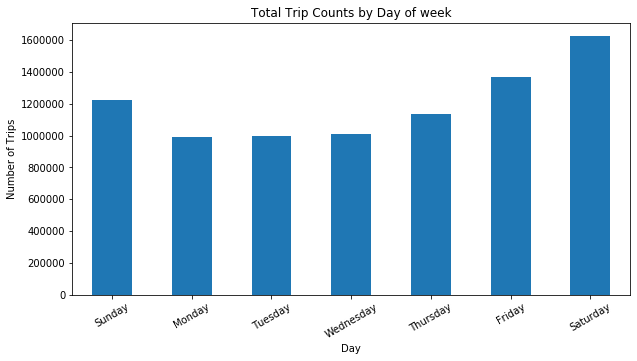

In [12]:
# Count trips per day and sort by day:
daily_total = pd.DataFrame(df['Day Of Week'].value_counts().sort_index())

# Map day of week with actual names:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_total['Day'] = days

# Plot glyph: 
daily_total.plot(kind='bar', x='Day', y='Day Of Week', title='Total Trip Counts by Day of week', figsize = (10,5), rot= 30, legend=False)
plt.ylabel("Number of Trips")
plt.savefig("shared_mobility_AODP/Plots/trips_per_week.png")
plt.show()

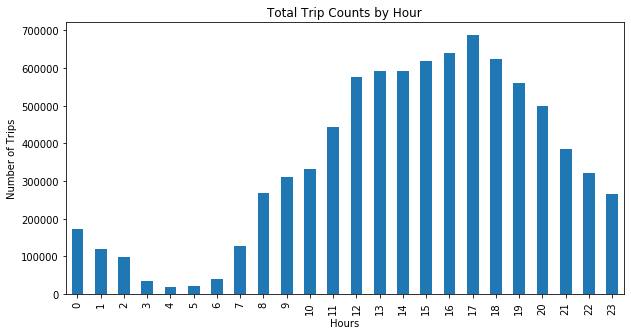

In [9]:
# Count trips per hour and sort by hour:
hourly_total = pd.DataFrame(df['Hour'].value_counts().sort_index())
#hours = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18', '19','20','21','22','23']
#hours = ['0','1','10','11','12','13','14','15','16','17','18','19','2','20','21','22','23','3','4','5','6','7','8','9']
#hourly_total['Hours'] = hours

hourly_total.reset_index().plot(kind='bar', x='index', y='Hour', title='Total Trip Counts by Hour', figsize = (10,5), legend=False)
plt.xlabel('Hours')
plt.ylabel('Number of Trips')
plt.savefig("shared_mobility_AODP/Plots/trips_per_hour.png")
plt.show()
#now shows correct plot with sorted xticks

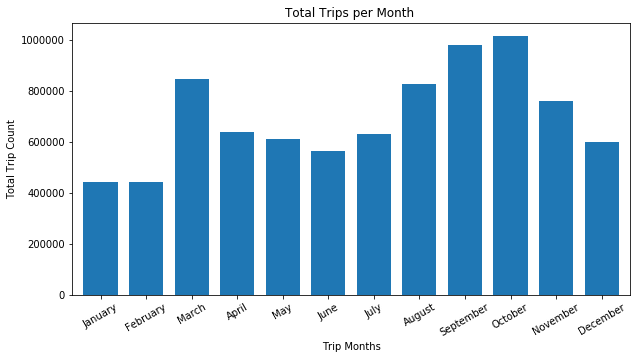

In [10]:
monthly_total = pd.DataFrame(df['Month'].value_counts()).sort_index()
import calendar
mn=[calendar.month_name[int(x)] for x in monthly_total.index.values.tolist()]

monthly_chart = monthly_total.plot.bar(title = "Total Trips per Month ",width = 0.75,figsize = (10,5),rot = 30, legend = False)
monthly_chart.set_xticklabels(mn)
monthly_chart.set_xlabel("Trip Months")
monthly_chart.set_ylabel("Total Trip Count")
plt.savefig("shared_mobility_AODP/Plots/trips_per_month1.png")
plt.show()
#now shows correct plot with sorted months

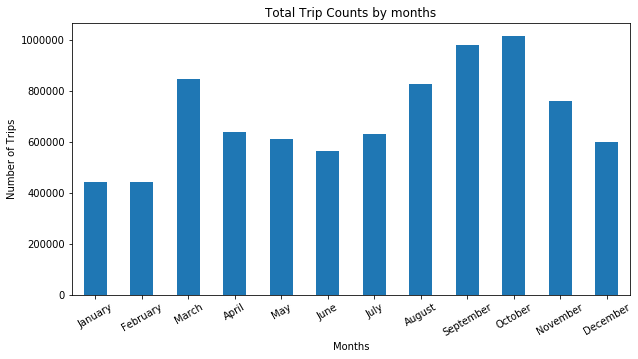

In [11]:
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_total['Months'] = month_list
monthly_total.reset_index().plot(kind='bar', x='Months', y='Month', title='Total Trip Counts by months', figsize = (10,5), rot = 30, legend=False)
plt.ylabel('Number of Trips')
plt.savefig("shared_mobility_AODP/Plots/trips_per_month2.png")
plt.show()
#now shows correct plot with sorted xticks

In [73]:
# Count how many trips started in each census GEOID tract
census_trip_start = pd.DataFrame(df['Census GEOID Start'].value_counts().head(10))
census_trip_start

Census GEOID Start
48453001100             3236435
48453000601              748545
48453000603              601132
48453000604              514316
48453001305              510164
48453000902              456009
48453001200              386962
48453000700              232937
48453001303              204956
48453001401              183566

In [74]:
# Count how many trips ended in each census tract
census_trip_end = pd.DataFrame(df['Census GEOID End'].value_counts())

In [ ]:
census_trip_start.reset_index().plot(kind='line', x='index', y = 'Census GEOID Start', figsize = (15,8))
plt.title("Total Count of trips starting per Census Tract")
plt.xlabel("GEOID ID")
plt.ylabel("Total Trips")
plt.savefig("Plots/trips_per_censustract.png")
plt.show()

In [ ]:
census = gpd.read_file('resources/geo-pandas_censustract/tl_2010_48453_tract10.shp')
streets = gpd.read_file('Street Centerline/geo_export_4ebdf92e-c800-46a8-869d-937430b9d126.shp')
streets = streets.to_crs(census.crs)